In [ ]:
## IMPORT BASIC LIBRARIES
#pvg7698
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# For timeseries RNN LSTM neural network
#pvg7698
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

2024-11-21 02:29:14.271427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 02:29:14.295649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 02:29:14.302951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 02:29:14.321193: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 02:29:15.696038: W tensorflow/compiler/tf2

In [ ]:
# IMPORT KERAS: Timeseries Generator
# This class produces time series batches used on training/testing the model
#pvg7698
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# IMPORT KERAS: MinMaxScaler
# This class is used to preprocess (scale) the data
#pvg7698
from sklearn.preprocessing import MinMaxScaler

## Data Set: APPL

In [ ]:
#pvg7698
dir_path_dataset_1 = 'AAPL .csv'

### Load Dataset

In [ ]:
#pvg7698
df_ALL = pd.read_csv(dir_path_dataset_1)

In [ ]:
#pvg7698
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-08-2019,53.247501,53.412498,52.900002,53.160000,51.439957,86141600
1,22-08-2019,53.297501,53.610001,52.687500,53.115002,51.396408,89014800
2,23-08-2019,52.357498,53.012501,50.250000,50.660000,49.020855,187272000
3,26-08-2019,51.465000,51.797501,51.264999,51.622501,49.952206,104174400
4,27-08-2019,51.965000,52.137501,50.882500,51.040001,49.388554,103493200


In [ ]:
# Convert the 'Date' column to datetime
df_ALL['Date'] = pd.to_datetime(df_ALL['Date'], format='%d-%m-%Y')

# Filter data for the year 2021
df_2021 = df_ALL[df_ALL['Date'].dt.year >= 2021]

# Reset the index
df_2021 = df_2021.reset_index(drop=True)

# Display the first few rows of the filtered data
print(df_2021.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2021-01-04  133.520004  133.610001  126.760002  129.410004  126.683441   
1 2021-01-05  128.889999  131.740005  128.429993  131.009995  128.249710   
2 2021-01-06  127.720001  131.050003  126.379997  126.599998  123.932640   
3 2021-01-07  128.360001  131.630005  127.860001  130.919998  128.161621   
4 2021-01-08  132.429993  132.630005  130.229996  132.050003  129.267822   

      Volume  
0  143301900  
1   97664900  
2  155088000  
3  109578200  
4  105158200  


In [ ]:
#pvg7698
df_ALL = df_2021

In [ ]:
#pvg7698
df_ALL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
909,2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000
910,2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200
911,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
912,2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30241200
913,2024-08-21,226.490005,227.979996,225.634995,225.901199,225.901199,17963441


### Brief Exploratory Data Analysis (EDA)

In [ ]:
#pvg7698
df_ALL.shape

(914, 7)

In [ ]:
#pvg7698
df_ALL.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
#pvg7698
df_ALL.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,914,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02
mean,2022-10-27 02:31:14.835886336,162.425372,164.191466,160.812347,162.576872,161.007665,7.629856e+07
min,2021-01-04 00:00:00,119.029999,120.400002,116.209999,116.360001,114.078583,1.796344e+07
25%,2021-11-29 06:00:00,144.040001,146.474998,142.652496,144.810001,142.812573,5.493328e+07
50%,2022-10-25 12:00:00,161.504998,164.229996,159.680000,161.985001,159.789917,7.058735e+07
75%,2023-09-24 06:00:00,178.059997,179.715000,176.744996,178.427501,176.806893,9.037148e+07
max,2024-08-21 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08
std,NaN,24.289371,24.377250,24.235904,24.320293,24.876434,2.869910e+07


### Keeping only 'Close' and filtering out rest all other attributes

In [ ]:
#pvg7698
df = df_ALL.iloc[:,4:5]

In [ ]:
#pvg7698
df.tail()

,Close
909,224.720001
910,226.050003
911,225.889999
912,226.509995
913,225.901199


<Axes: >

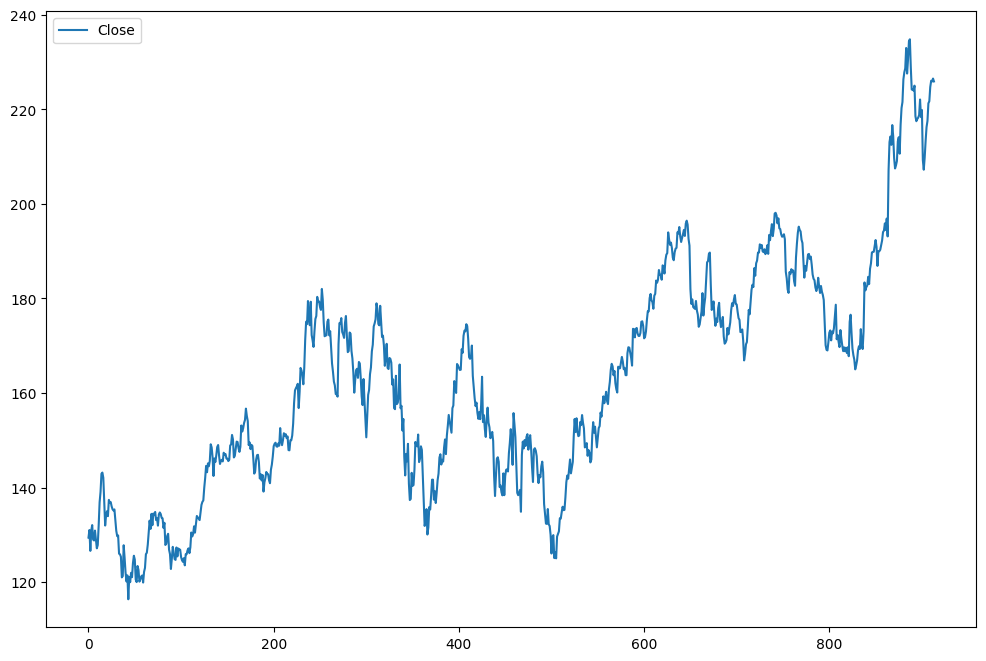

In [ ]:
#pvg7698
df.plot(figsize=(12,8))

### Length of Input Time Series - Number of Input Time Steps
#pvg7698


In [ ]:
# Set the length of the input sequence
#i.e., the number of time series steps that are used to predict the future one
# Currently use 60 historical data points to predict the next one
# It means that 60 consecutive closing prices will be used to predict the next one
length60 = 60


In [ ]:
#pvg7698
length60

60

### Time Series Dataset: Train/test Split


In [ ]:
#pvg7698
len(df)


914

In [ ]:
#Set percentage of data used for testing
test_percent=0.1

In [ ]:
# Number of data points reserved for testing the model
# 20% of the original dataset
#pvg7698
len(df)*test_percent

91.4

### Spliting data ---> Train/Test

In [ ]:
#Need to find the length (number of data points) of the testing dataset
# It has been found (above) that around 205 data points are used for testing
#pvg7698
test_length = np.round(len(df)*test_percent)
test_length

91.0

In [ ]:
# The testing data set starts at this index
#test_start_index = int(len(df) test_length)
#pvg7698
split_index =int(len(df)-test_length)
split_index

823

In [ ]:
# Create separate trainging / testing datasets
# Training dataset: All the indices from start to split_index
# (excluding split index)

data_train = df.iloc[: split_index]

# Testing dataset:
#--) All the indices from (split_index - Length60) to the end of the dataframe
#--) split_index length60: Need the last 60 historical data points (belong to data_train)
# to predict the first data point of the data_test

data_test = df.iloc[split_index - length60 :]

In [ ]:
#pvg7698
data_train.head(5)

,Close
0,129.410004
1,131.009995
2,126.599998
3,130.919998
4,132.050003


In [ ]:
data_train.tail()

,Close
818,169.580002
819,168.449997
820,169.669998
821,167.779999
822,175.039993


In [ ]:
data_test.head()

,Close
763,182.679993
764,188.630005
765,191.559998
766,193.889999
767,195.179993


In [ ]:
data_test.tail()

,Close
909,224.720001
910,226.050003
911,225.889999
912,226.509995
913,225.901199


### Normalize data

In [ ]:
#pvg7698
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()


In [ ]:
# IGNORE the warning: Just converting the data to floats
# ONLY scale the TRAINING dat - NOT scale testing data
# Train the scaler to perform the normalization
#pvg7698
scaler.fit(data_train)


MinMaxScaler()

In [ ]:
# Normalize the training dataset
#pvg7698
normalized_train = scaler.transform(data_train)

In [ ]:
# Normalize the testing dataset
#pvg7698
normalized_test = scaler.transform(data_test)


## Create Timeseries Generator for Training

In [ ]:
# Timeseries Generator: Generate time series batches for training/testing
# Set the length of the input sequence as above
# Length60
# batch_size: Number of time series samples in each batch
# Sample: A single time series input that has 60 historical data points
batch_size32 = 32
# Create a Time Series Generator for training: train_tsGenerator
#--) This time series generator produces time series batches used to train the model
# TimeseriesGenerator (inputs, outputs, length, batch_size)
#--) Normally: INPUTS & OUTPUTS are the same datset during training & testing/validation
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [ ]:
len(normalized_train)

823

In [ ]:
len(train_tsGenerator60)

24

In [ ]:
# What does the first batch Look Like?
#pvg7698
X,y = train_tsGenerator60[0]

In [ ]:
print(X)

[[[0.15963306]
  [0.17920482]
  [0.1252599 ]
  ...
  [0.05932719]
  [0.06152903]
  [0.04330276]]

 [[0.17920482]
  [0.1252599 ]
  [0.17810394]
  ...
  [0.06152903]
  [0.04330276]
  [0.0708257 ]]

 [[0.1252599 ]
  [0.17810394]
  [0.19192663]
  ...
  [0.04330276]
  [0.0708257 ]
  [0.08122323]]

 ...

 [[0.20587157]
  [0.17712532]
  [0.16330283]
  ...
  [0.16941903]
  [0.12831801]
  [0.11681961]]

 [[0.17712532]
  [0.16330283]
  [0.16525987]
  ...
  [0.12831801]
  [0.11681961]
  [0.07840974]]

 [[0.16330283]
  [0.16525987]
  [0.11792048]
  ...
  [0.11681961]
  [0.07840974]
  [0.1053211 ]]]


In [ ]:
#pvg7698
print(y)

[[0.0708257 ]
 [0.08122323]
 [0.11669726]
 [0.12048927]
 [0.14116209]
 [0.17125382]
 [0.20354739]
 [0.1820184 ]
 [0.22103966]
 [0.19168193]
 [0.22189601]
 [0.21773704]
 [0.22605498]
 [0.20489297]
 [0.2096636 ]
 [0.19058105]
 [0.21969426]
 [0.22458716]
 [0.22055043]
 [0.21064221]
 [0.2094189 ]
 [0.18470955]
 [0.19792039]
 [0.14055042]
 [0.14360862]
 [0.16366977]
 [0.16941903]
 [0.12831801]
 [0.11681961]
 [0.07840974]
 [0.1053211 ]
 [0.13565744]]


## Build, Train, and Test Model

### Building LSTM Model

In [ ]:
#Only using one feature: Close price
#pvg7698
n_features = 1

In [ ]:
# define model
model =  Sequential()

# Add an LSTM Layer
# This layer has 50 LSTM cells
# Activation function: relu
# MUST: return_sequences=True
#--) Because of multiple LSTM Layers: the Layers are stacked
#--) Outputs inputs of the next LSTM Layer

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

# Dropout Layer
model.add(Dropout (0.2))

# Add 2nd LSTM Layer
# MUST: return_sequences=True
#--) Because of multiple LSTM Layers: the layers are stacked
#--) Outputs = inputs of the next LSTM Layer

model.add(LSTM(units=50, activation='relu', return_sequences =True))

# Dropout Layer
model.add(Dropout (0.2))

# Add 3rd LSTM Layer
model.add(LSTM(units=50, activation='relu'))

# Add a FC (fully-connected) Layer for the final prediction
model.add(Dense(1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

### Train (Fit) Model Using fit_generator()

In [ ]:
# Train the model
model.fit(train_tsGenerator60, epochs=100)

Epoch 1/100
 2/24 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1246

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.2287
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0308
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0202
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0153
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0183
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0096
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0099
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0125
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0087
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0105
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0081
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0078
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0069
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0091
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0083
E

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0042
Epoch 82/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0039
Epoch 83/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0029
Epoch 84/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0023
Epoch 85/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0030
Epoch 86/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0028
Epoch 87/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0028
Epoch 88/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0033
Epoch 89/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0039
Epoch 90/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0032
Epoch 91/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0030
Epoch 92/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0028
Epoch 93/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0028
Epoch 94/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0032
Epoch 95/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 

### Visualize Model's Performance after Training

In [ ]:
loss_history_keys = model.history.history.keys()
#model.history.history is a dict
# 'loss': its key
# 'Loss': loss during training;
loss_history_keys


dict_keys(['loss'])

In [ ]:
# Load the loss data (model.history.history) into a data frame
df_model_loss = pd.DataFrame(model.history.history)

<Axes: >

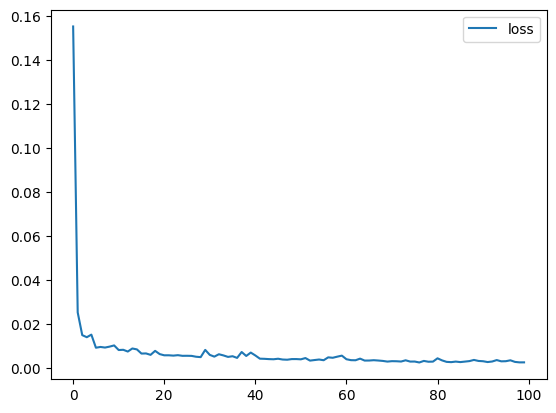

In [ ]:
# Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

### Prediction for Testing: Using Timeseries Generator


In [ ]:
#Create Timeseries Generator for Testing
#batch_size MUST be 1
batch_size1 = 1
# Create a Time Series Generator for testing: test_tsGenerator
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)


### Predict Future Data Points for Testing

In [ ]:
normalized_prediction = model.predict(test_tsGenerator60)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
# Prediction is a numpy 2D array with only one column
normalized_prediction

array([[0.64479965],
       [0.66810006],
       [0.6789779 ],
       [0.6637095 ],
       [0.63478386],
       [0.6079889 ],
       [0.5842467 ],
       [0.57500315],
       [0.58144295],
       [0.6021822 ],
       [0.62408966],
       [0.63568026],
       [0.6497605 ],
       [0.65532416],
       [0.64873624],
       [0.6544921 ],
       [0.6793987 ],
       [0.7074149 ],
       [0.7325546 ],
       [0.75196016],
       [0.76810086],
       [0.77580255],
       [0.7853255 ],
       [0.79636097],
       [0.8097685 ],
       [0.82161623],
       [0.8302082 ],
       [0.8382672 ],
       [0.8473038 ],
       [0.8503511 ],
       [0.8278292 ],
       [0.82228464],
       [0.8286467 ],
       [0.83723176],
       [0.8477928 ],
       [0.85738045],
       [0.86838394],
       [0.8776588 ],
       [0.8869442 ],
       [0.8912046 ],
       [0.8978825 ],
       [0.8874342 ],
       [0.9093656 ],
       [0.939749  ],
       [0.96903753],
       [0.98907644],
       [1.007959  ],
       [1.019

In [ ]:
len(normalized_prediction)

91

In [ ]:
# Convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [ ]:
# Flatten all the 2D array
#data_train = data_train.reshape((-1))
# data_test-data_test.reshape((-1))
# prediction = prediction.reshape((-1))
prediction_index = np.arange(823, 914, step=1)
df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])


In [ ]:
df_prediction

,Prediction
823,169.072372
824,170.977188
825,171.866455
826,170.618271
827,168.253586
...,...
909,204.495148
910,205.540649
911,206.590408
912,207.369385


## Visualize Prediction

<Axes: >

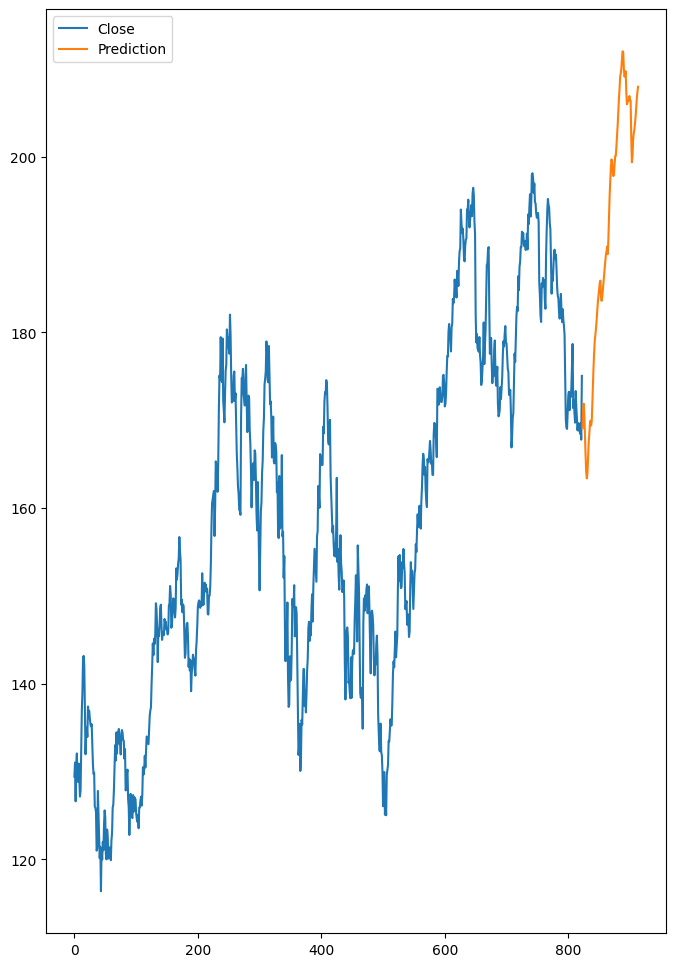

In [ ]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

### Visualize Prediction and Compare Actual Close Price

<Axes: >

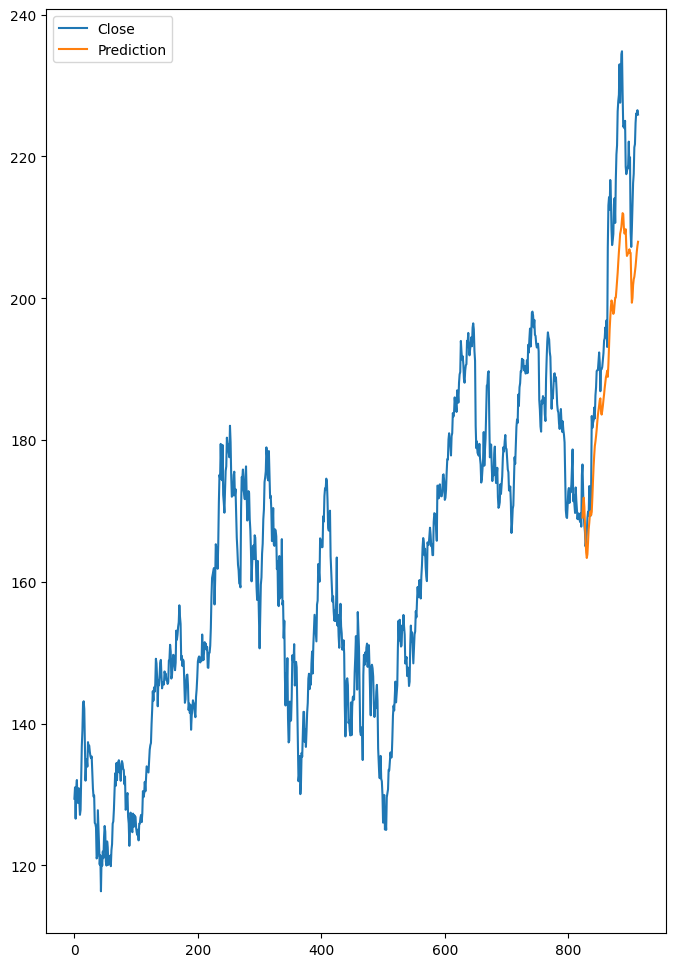

In [ ]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

# Time Series Forecasting with LSTM
### Overview
### Time series forecasting:
### --) Forecast into the "future" or unknown range
### --) Should employ all the available data
### --) i.e., NOT split the data into training/testing
### Preprocess Full Input Dataset


In [ ]:
# Still use MinMaxScaler to normalize the full input dataset df
full_scaler= MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)


### Create TimeSeries Generastor for Forecasting

In [ ]:

# Number of time steps of the input time series
# Still use length60:
length60


60

In [ ]:
# Create Timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=32)

## Build, Compile, and Fit LSTM Model for Forecasting


In [ ]:
# Train/Fit LSTM model
# In forecasting, we don't validate, only FORECAST
# So, not need Earlystop; Not need validation_generator
model.fit(forecast_tsGenerator, epochs = 100)

Epoch 1/100
 3/27 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0013

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0015
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0018
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0022
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0015
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0016
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0022
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0019
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0017
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0013
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0015
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0014
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0018
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0020
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0014
E

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0011
Epoch 82/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0015
Epoch 83/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0016
Epoch 84/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013
Epoch 85/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0021
Epoch 86/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0022
Epoch 87/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0017
Epoch 88/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0017
Epoch 89/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0014
Epoch 90/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012
Epoch 91/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0014
Epoch 92/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012
Epoch 93/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012
Epoch 94/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013
Epoch 95/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 

## Time Series Forecast Using LSTM Neural Network:


In [ ]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 60 business days
periods = 60
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))
for i in range(periods):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    #store prediction
    forecast.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

### Inverse to Transform Normalized Data Back into True Values

In [ ]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[221.96295829],
       [219.90795748],
       [217.66120037],
       [215.59724651],
       [213.77155116],
       [212.20295244],
       [210.88119812],
       [209.78092592],
       [208.89030201],
       [208.18611764],
       [207.6276463 ],
       [207.17770601],
       [206.80294171],
       [206.47503265],
       [206.17189275],
       [205.87769885],
       [205.58086423],
       [205.27410216],
       [204.95378343],
       [204.61906779],
       [204.27129679],
       [203.9131041 ],
       [203.54797774],
       [203.17961755],
       [202.81197755],
       [202.4487929 ],
       [202.09297969],
       [201.74671264],
       [201.41150274],
       [201.0881973 ],
       [200.77703638],
       [200.47788582],
       [200.19023725],
       [199.91337047],
       [199.64646644],
       [199.38866373],
       [199.13909387],
       [198.89935966],
       [198.6705414 ],
       [198.45189064],
       [198.24276486],
       [198.04221085],
       [197.84928952],
       [197

In [ ]:
df

,Close
0,129.410004
1,131.009995
2,126.599998
3,130.919998
4,132.050003
...,...
909,224.720001
910,226.050003
911,225.889999
912,226.509995


## Creating new timestamp index with pandas

In [ ]:
# Calculate forecast index
forecast_index = np.arange(914, 974, step=1)

In [ ]:
forecast_df=pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
914,221.962958
915,219.907957
916,217.661200
917,215.597247
918,213.771551
919,212.202952
920,210.881198
921,209.780926
922,208.890302
923,208.186118


### PLot the Forecast


<Axes: >

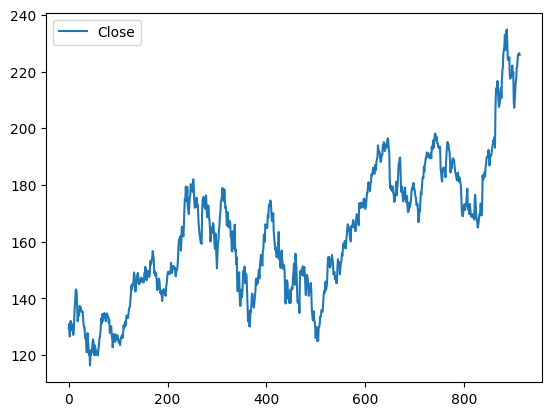

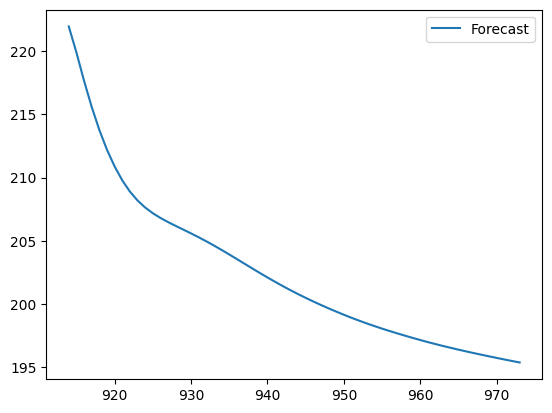

In [ ]:
df.plot()
forecast_df.plot()

<Axes: >

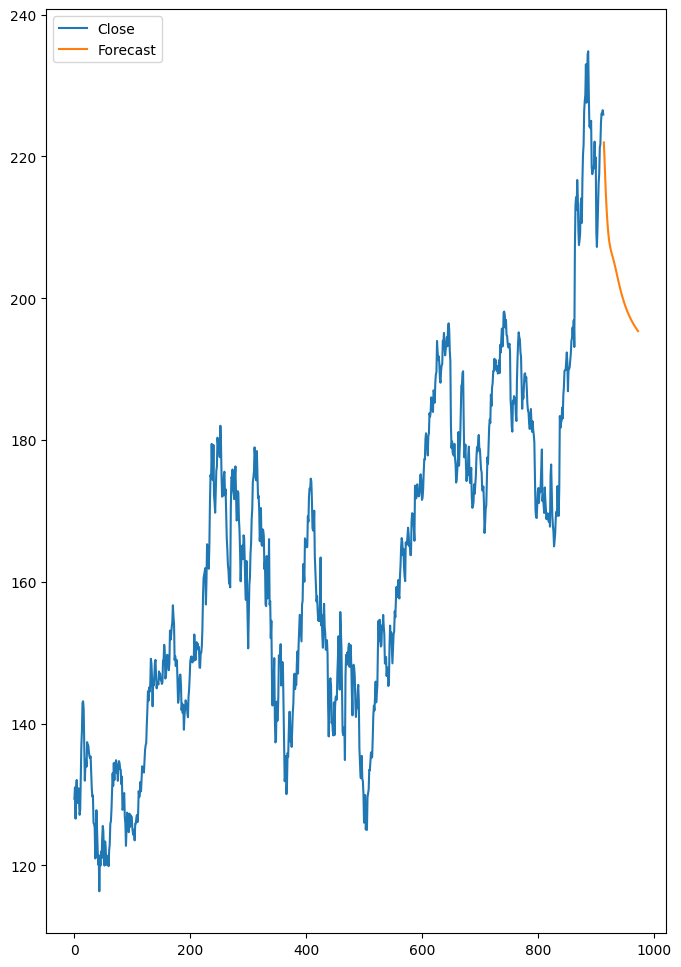

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(8, 12))

In [ ]:
dir_2 = pd.read_csv("AAPL_New.csv")

In [ ]:
re_df = dir_2

In [ ]:
re_df.head()

,Date,Close
0,08-20-2024,226.51
1,08-21-2024,226.40
2,08-22-2024,224.53
3,08-23-2024,226.84
4,08-26-2024,227.18


In [ ]:
re_df = re_df.drop(columns=['Date'])


In [ ]:
re_df = fore_df.drop(index=fore_df.index[0])


In [ ]:
# Drop the first row and the last four rows
re_df = fore_df.drop(index=fore_df.index[[-1, -2, -3, -4]])


In [ ]:
re_df.head()

,Close,Forecast
1,226.40,221.962958
2,224.53,219.907957
3,226.84,217.661200
4,227.18,215.597247
5,228.03,213.771551


<Axes: >

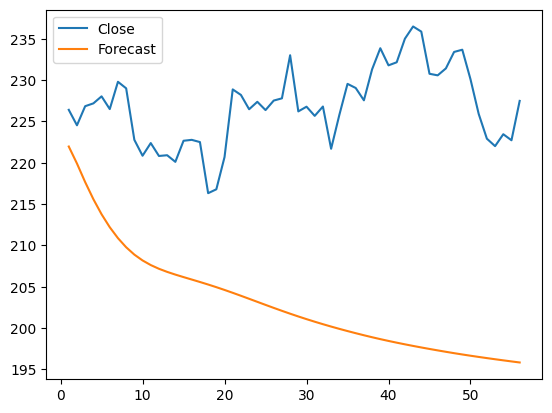

In [ ]:
re_df.plot()

In [ ]:
re_df['Forecast'].values

array([221.96295829, 219.90795748, 217.66120037, 215.59724651,
       213.77155116, 212.20295244, 210.88119812, 209.78092592,
       208.89030201, 208.18611764, 207.6276463 , 207.17770601,
       206.80294171, 206.47503265, 206.17189275, 205.87769885,
       205.58086423, 205.27410216, 204.95378343, 204.61906779,
       204.27129679, 203.9131041 , 203.54797774, 203.17961755,
       202.81197755, 202.4487929 , 202.09297969, 201.74671264,
       201.41150274, 201.0881973 , 200.77703638, 200.47788582,
       200.19023725, 199.91337047, 199.64646644, 199.38866373,
       199.13909387, 198.89935966, 198.6705414 , 198.45189064,
       198.24276486, 198.04221085, 197.84928952, 197.66313241,
       197.48301225, 197.30830771, 197.13853157, 196.97329551,
       196.81585454, 196.66423164, 196.51791137, 196.37633594,
       196.23894755, 196.10521663, 195.97469836, 195.84706088])

In [ ]:
re_df['Forecast'] = re_df['Forecast'].values

<Axes: >

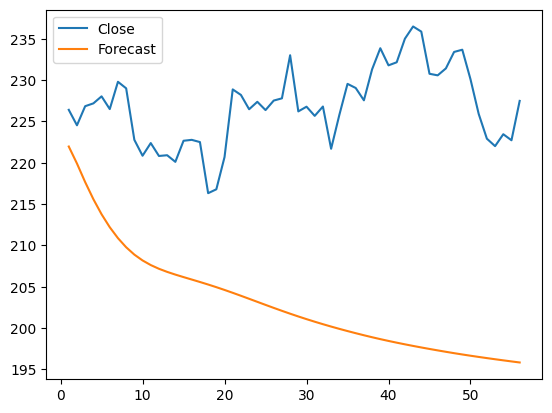

In [ ]:
re_df.plot()